<a href="https://colab.research.google.com/github/Yash-slr/SCT_TrackCode_TaskNumber/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [49]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [51]:
print(train_df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [52]:
list(set(train_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [36]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
train_df = train_df.dropna(subset=features)
X = train_df[features]
y = np.log1p(train_df['SalePrice'])

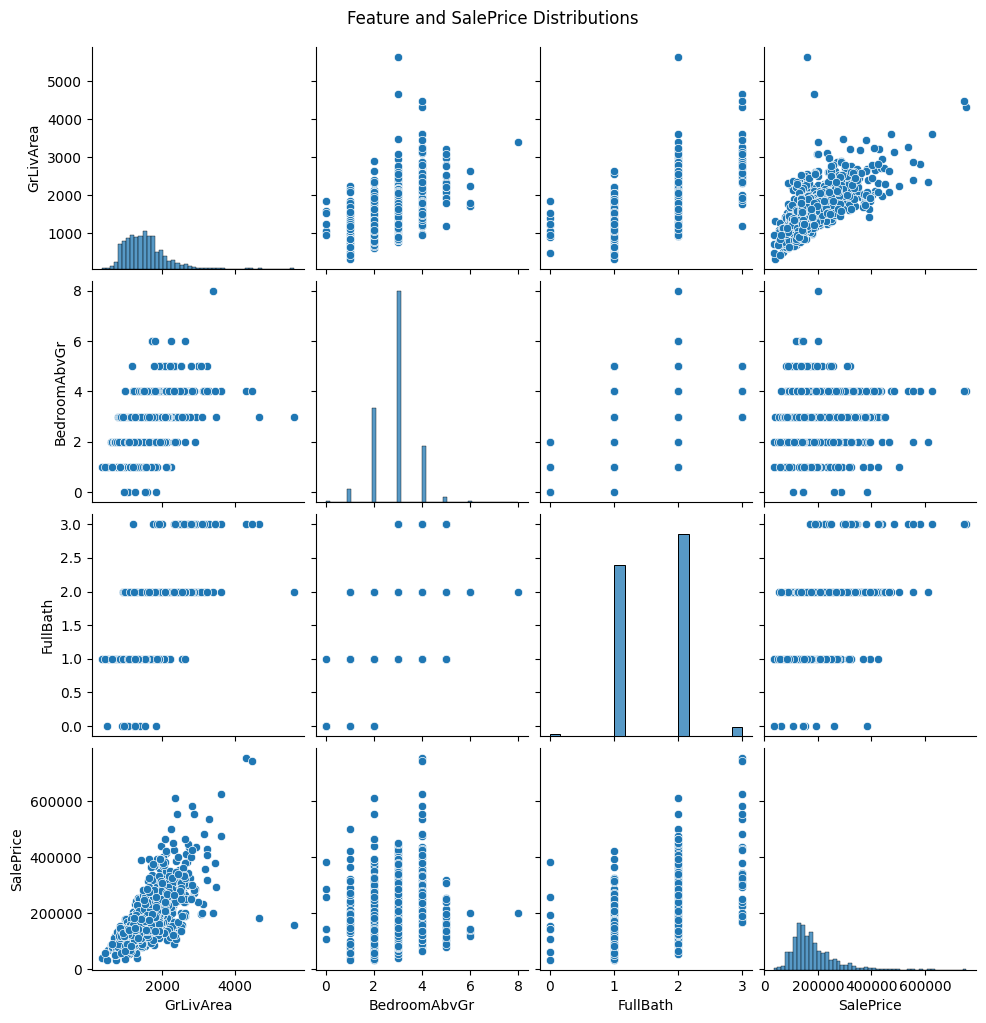

In [37]:
sns.pairplot(train_df, vars=features + ['SalePrice'])
plt.suptitle("Feature and SalePrice Distributions", y=1.02)
plt.show()

In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(features)
force_include = [i for i, name in enumerate(feature_names) if 'BedroomAbvGr' in name]

In [39]:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(X_poly, y)
selected = list(set(force_include + list(selector.get_support(indices=True))))
selected.sort()

Selected Features (including forced BedroomAbvGr-related):
 - GrLivArea
 - BedroomAbvGr
 - FullBath
 - GrLivArea^2
 - GrLivArea BedroomAbvGr
 - GrLivArea FullBath
 - BedroomAbvGr^2
 - BedroomAbvGr FullBath
 - FullBath^2


<ipython-input-42-cdbcf79dc724>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=selected_feature_names, palette='coolwarm')


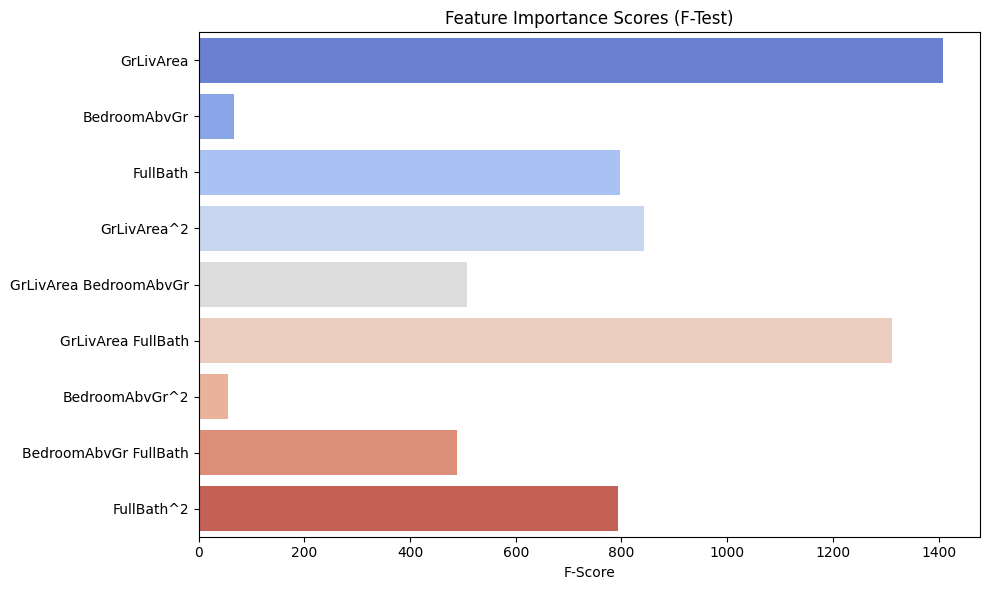

In [42]:
X_selected = X_poly[:, selected]
selected_feature_names = feature_names[selected]
print("Selected Features (including forced BedroomAbvGr-related):")
for feat in selected_feature_names:
    print(f" - {feat}")
scores = selector.scores_[selected]
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=selected_feature_names, palette='coolwarm')
plt.title('Feature Importance Scores (F-Test)')
plt.xlabel('F-Score')
plt.tight_layout()
plt.show()

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
y_val_actual = np.expm1(y_val)
mse = mean_squared_error(y_val_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_actual, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 54556.27
R² Score: 0.6120


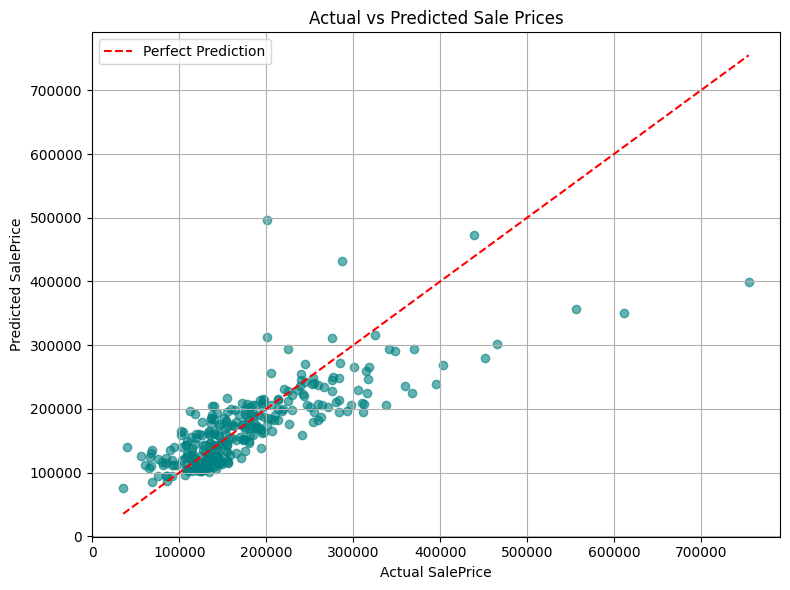

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val_actual, y_pred, alpha=0.6, color='teal')
plt.plot([y_val_actual.min(), y_val_actual.max()],[y_val_actual.min(), y_val_actual.max()],'r--', label='Perfect Prediction')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Sale Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

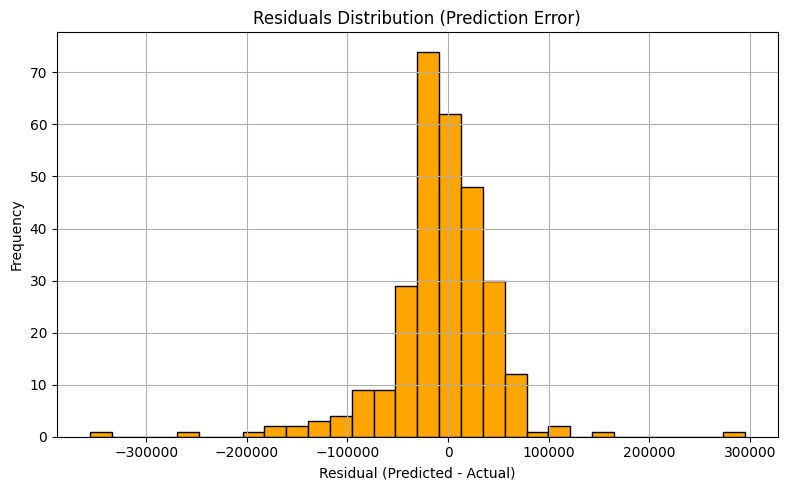

In [46]:
residuals = y_pred - y_val_actual
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='orange', edgecolor='black')
plt.title('Residuals Distribution (Prediction Error)')
plt.xlabel('Residual (Predicted - Actual)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
X_test = test_df[features].fillna(0)
X_test_poly = poly.transform(X_test)
X_test_selected = X_test_poly[:, selected]

In [48]:
test_preds_log = model.predict(X_test_selected)
test_preds = np.expm1(test_preds_log)
submission = pd.DataFrame({'Id': test_df['Id'],'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)
print(" Submission file saved as 'submission.csv'")

 Submission file saved as 'submission.csv'
